In [17]:
import torch
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

### take a partial derivative at a point on a surface with pytorch


In [22]:
# step 1. define point you are finding the slope around
u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
# step 2. define surface the point is on 
f = u*v + u**2 
# calculate partial deriative equation for reference 
dfu = v + 2*u 
dfv = u 
# step 3. use pytorch to calculate the partial deriatives at that point
f.backward()
# step 4. check output 
print(f'the value at that point on the surface is: {f}')
print(f'the slope in the v direction is: {v.grad}')
print (f'the slope in the u direction is: {u.grad}')


the value at that point on the surface is: 3.0
the slope in the v direction is: 1.0
the slope in the u direction is: 4.0


### take derivative at multiple values 

In [23]:
# step 1. define your inputs
x = torch.linspace(-10,10,10,requires_grad=True)
# step 2. define your surface / function
Y = (x**3)+2*x
#step 3. run an operation on x to calculate the gradient for all values of x
y=torch.sum((x**3)+2*x) # scalar 
y.backward() # calculate gradients that went into single output

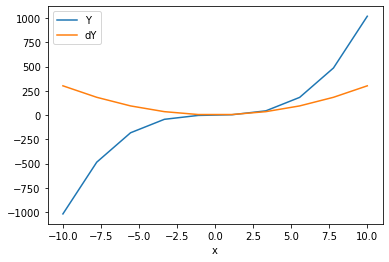

In [24]:
# step 4. detach values and gradients and plot
x_arr = x.detach().numpy() # detatch so no longer tracked
Y_arr = Y.detach().numpy() # detatch so no longer tracked 
dY_arr = x.grad.detach().numpy() # detach so no longer tracked

plt.plot(x_arr, Y_arr, label ='Y')
plt.plot(x_arr, dY_arr,label='dY')
plt.xlabel('x')
plt.legend()
plt.show()

In [25]:
# step 1. define your inputs
x = torch.linspace(-10,10,10,requires_grad=True)
# step 2. define your surface / function
Y = x**3+2*x
#step 3. calculate the gradient for all values of x
external_grad = torch.tensor([1.0]*x.shape[0]) # make tensor of ones same shape as x
Y.backward(gradient=external_grad)

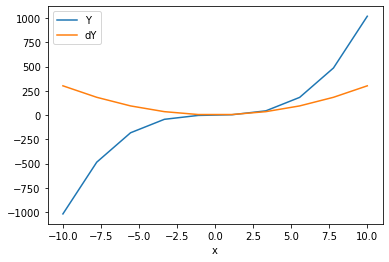

In [26]:
# step 4. detach values and gradients and plot
x_arr = x.detach().numpy() # detatch so no longer tracked
Y_arr = Y.detach().numpy() # detatch so no longer tracked 
dY_arr = x.grad.detach().numpy() # detach so no longer tracked

plt.plot(x_arr, Y_arr, label ='Y')
plt.plot(x_arr, dY_arr,label='dY')
plt.xlabel('x')
plt.legend()
plt.show()